### Introduction
The Horse Colic Dataset is a collection of medical records for horses suffering from colic, a common equine emergency. The dataset aims to predict the outcome (survival or non-survival) of horses based on their medical conditions, treatment, and other factors. With 28 attributes and 368 instances, this dataset provides a comprehensive understanding of equine colic and its management.

### Dataset Information
The Horse Colic Dataset contains 368 instances, each representing a horse's medical record. The dataset includes 28 attributes, which can be categorized into:
- Demographic information (age, hospital number)
- Clinical measurements (rectal temperature, pulse, respiratory rate, etc.)
- Subjective assessments (pain level, mucous membranes, capillary refill time, etc.)
- Treatment and diagnostic information (surgery, nasogastric tube, abdominocentesis, etc.)
- Outcome (lived, died, euthanized)

The dataset also includes information on the type of lesion, its location, and whether surgery was performed. Missing values (NA's) are present in the data, requiring appropriate handling for analysis.

### Attribute Information:
- 1-3: Demographic and identification information
- 4-11: Clinical measurements and observations
- 12-23: Treatment, diagnostic, and outcome information
- 24-27: Lesion type and location
- 28: Pathology data availability (not relevant for this dataset)

### Acknowledgements:
This dataset was originally published by the UCI Machine Learning Database: http://archive.ics.uci.edu/ml/datasets/Horse+Colic

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (22,5)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score

#Models
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

#Model Performance Evaluators
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

In [5]:
df =  pd.read_csv('https://raw.githubusercontent.com/dakshbhatnagar/Datasets/main/playground-series-s3e22/train.csv')
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [8]:
conn = sqlite3.connect('horse_disease.db')
df.to_sql('data', conn, if_exists='replace', index=False)

1235

In [16]:
horses = len(df)
print(f"There are {horses} horses in the dataset.")

There are 1235 horses in the dataset.


Show a distribution of the surgeries

In [17]:
query = '''
select surgery, round(count(surgery)/1235.0*100,2) as Percent from data group by 1
'''
pd.read_sql(query, conn)

,surgery,Percent
0,no,28.18
1,yes,71.82


71% have had surgery while 28% have not had surgery

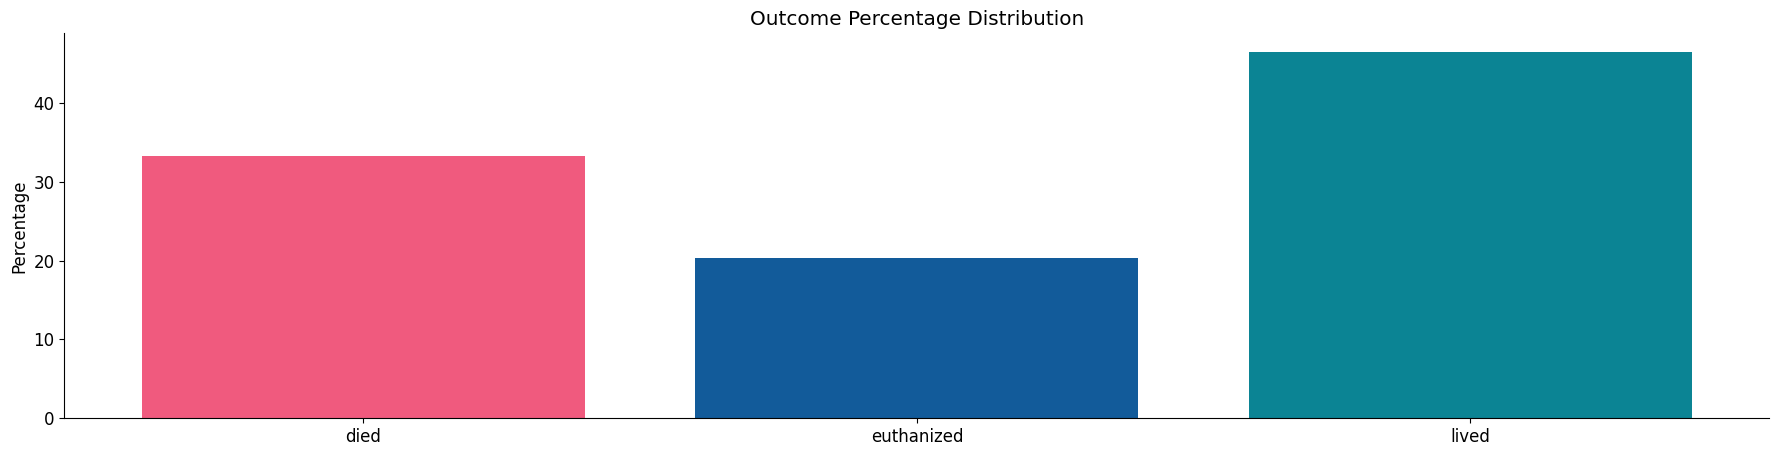

In [32]:
query = '''
select outcome, round(count(outcome)/1235.0*100,2) as Percent 
        from data 
group by 1
'''
colors = ['#F05A7E', '#125B9A', '#0B8494']
temp = pd.read_sql(query, conn)
plt.bar(x=temp['outcome'], height=temp['Percent'], color=colors)
plt.title('Outcome Percentage Distribution')
plt.ylabel('Percentage')
plt.show()

- 46.5% horses have lived however 33.2% have died. 
- Euthanized means to end an animal's life humanely, typically to prevent further suffering or pain. It is a deliberate act to end an animal's life, usually performed by a veterinarian.

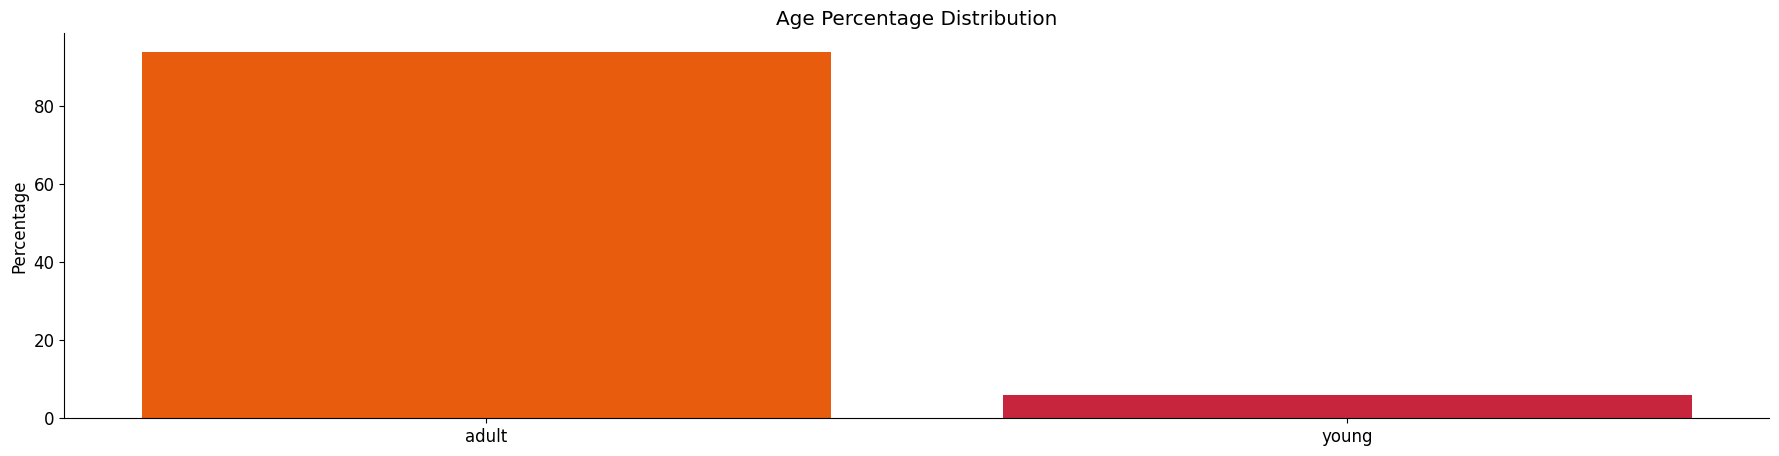

In [36]:
query = '''
select age, round(count(age)/1235.0*100,2) as Percent 
        from data 
group by 1
'''
colors = ['#E85C0D', '#C7253E']
temp = pd.read_sql(query, conn)
plt.bar(x=temp['age'], height=temp['Percent'], color=colors)
plt.title('Age Percentage Distribution')
plt.ylabel('Percentage')
plt.show()

In [18]:
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [19]:
df.columns

Index(['id', 'surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'surgical_lesion', 'lesion_1', 'lesion_2', 'lesion_3',
       'cp_data', 'outcome'],
      dtype='object')

In [44]:
cat_cols = df.select_dtypes('object').columns.to_list()
num_cols = df.select_dtypes('float').columns.to_list() + df.select_dtypes('int').columns.to_list()

In [65]:
df[['id'] + cat_cols]

,id,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data,outcome
0,0,yes,adult,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,decreased,distend_small,serosanguious,yes,no,died
1,1,yes,adult,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,absent,distend_small,serosanguious,yes,no,euthanized
2,2,yes,adult,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,NaN,distend_large,serosanguious,yes,no,lived
3,3,yes,adult,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,decreased,distend_small,cloudy,yes,yes,lived
4,4,no,adult,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,normal,normal,cloudy,no,yes,lived
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,cool,reduced,pale_pink,more_3_sec,depressed,absent,moderate,none,more_1_liter,NaN,distend_large,serosanguious,yes,no,lived
1231,1231,yes,adult,cool,reduced,pale_cyanotic,less_3_sec,mild_pain,hypomotile,slight,slight,none,decreased,distend_small,serosanguious,yes,yes,died
1232,1232,yes,young,normal,reduced,normal_pink,less_3_sec,mild_pain,hypomotile,slight,slight,none,increased,firm,cloudy,yes,yes,lived
1233,1233,yes,adult,normal,reduced,bright_red,less_3_sec,mild_pain,hypomotile,slight,none,more_1_liter,absent,distend_small,cloudy,yes,no,lived


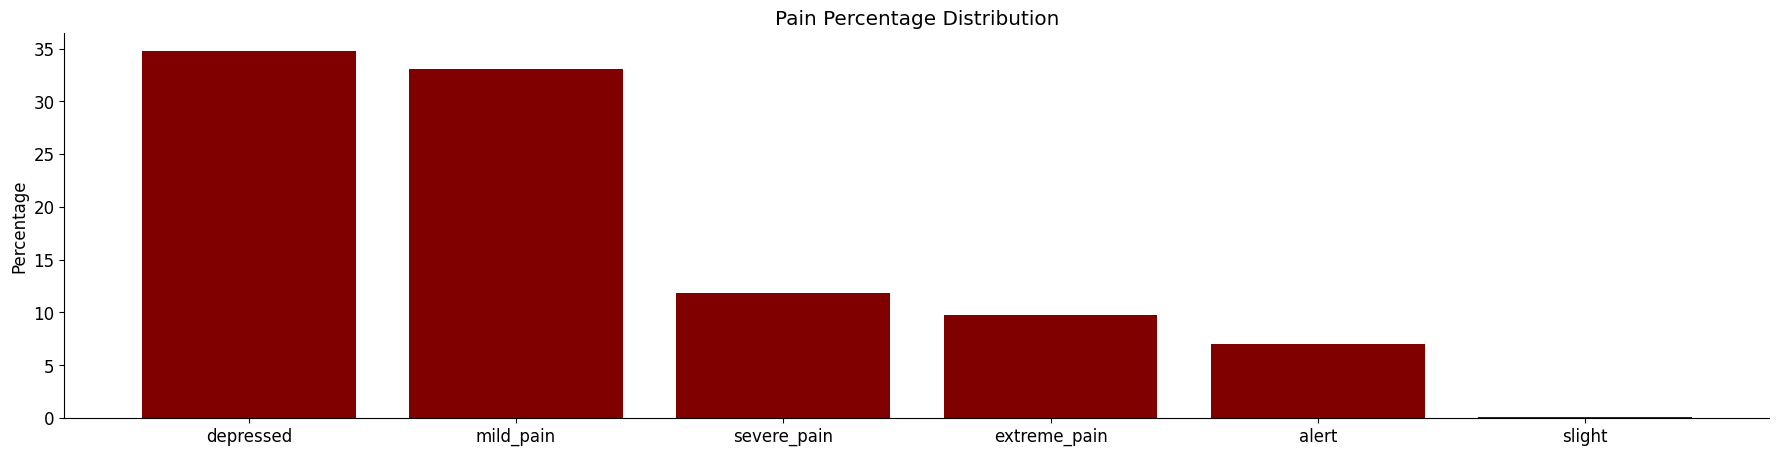

In [55]:
query = '''
select pain, round(count(pain)/1235.0*100,2) as Percent 
        from data where pain is not null
group by 1
order by 2 desc
'''
colors = ['#E85C0D', '#C7253E']
pain = pd.read_sql(query, conn)
plt.bar(x=pain['pain'], height=pain['Percent'], color='maroon')
plt.title('Pain Percentage Distribution')
plt.ylabel('Percentage')
plt.show()

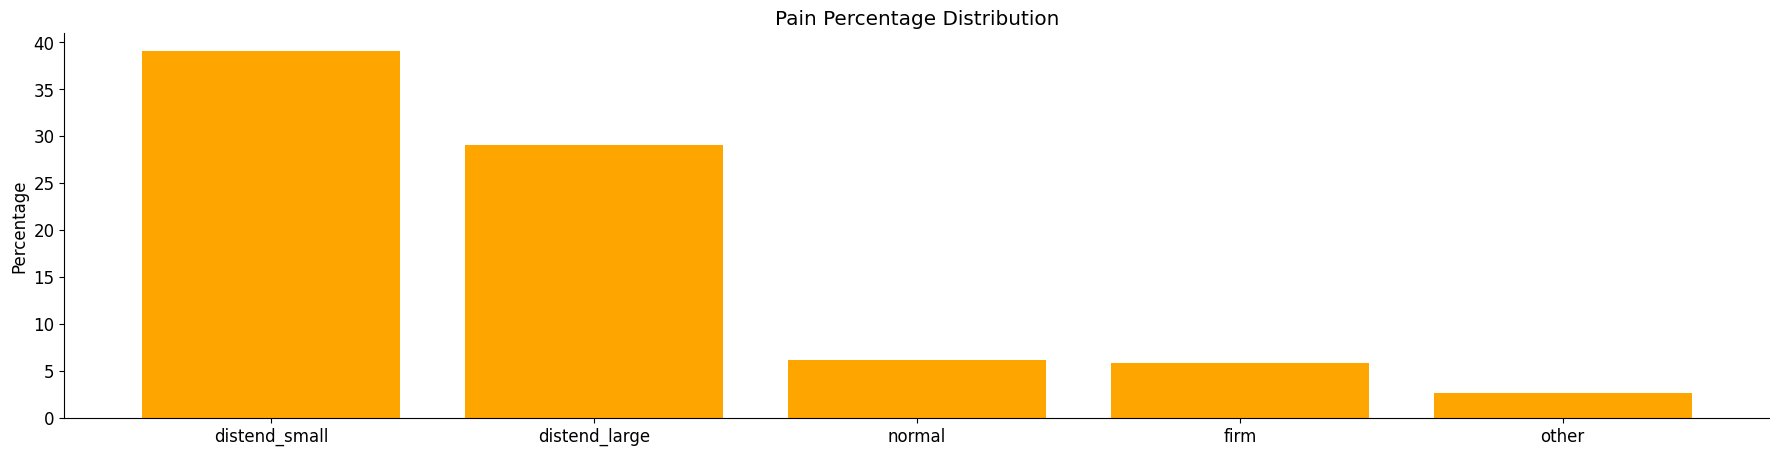

In [53]:
query = '''
select abdomen, round(count(abdomen)/1235.0*100,2) as Percent 
        from data where abdomen is not null
group by 1
order by 2 desc
'''
colors = ['#E85C0D', '#C7253E']
abdomen = pd.read_sql(query, conn)
plt.bar(x=abdomen['abdomen'], height=abdomen['Percent'], color='orange')
plt.title('Pain Percentage Distribution')
plt.ylabel('Percentage')
plt.show()

In [61]:
query = '''
select outcome, sum(rectal_temp) as RectalTemp, sum(pulse) as Pulse,
        sum(respiratory_rate) as RespRate, sum(nasogastric_reflux_ph) as NasoRefluxPH, 
        sum(packed_cell_volume) as PackedCellVol, sum(total_protein) as Protein,
        sum(abdomo_protein) as AbdomoProtein, sum(lesion_1) as Lesion_1, sum(lesion_2) as Lesion_2,
        sum(lesion_3) as Lesion_3
        from data where outcome is not null
group by 1
order by 2 desc
'''
outcome = pd.read_sql(query, conn)
outcome


,outcome,RectalTemp,Pulse,RespRate,NasoRefluxPH,PackedCellVol,Protein,AbdomoProtein,Lesion_1,Lesion_2,Lesion_3
0,lived,21936.5,39559.0,15568.0,2592.1,26538.5,11679.5,1904.1,2251080,9335,2209
1,died,15666.6,36985.0,13960.0,2051.9,21109.0,3638.9,1516.3,1606635,0,0
2,euthanized,9576.6,21730.0,7589.0,768.5,13611.5,11095.8,643.9,875418,8711,2209


In [62]:
query = '''
select surgery, sum(rectal_temp) as RectalTemp, sum(pulse) as Pulse,
        sum(respiratory_rate) as RespRate, sum(nasogastric_reflux_ph) as NasoRefluxPH, 
        sum(packed_cell_volume) as PackedCellVol, sum(total_protein) as Protein,
        sum(abdomo_protein) as AbdomoProtein, sum(lesion_1) as Lesion_1, sum(lesion_2) as Lesion_2,
        sum(lesion_3) as Lesion_3
        from data where surgery is not null
group by 1
order by 2 desc
'''
surgery = pd.read_sql(query, conn)
surgery


,surgery,RectalTemp,Pulse,RespRate,NasoRefluxPH,PackedCellVol,Protein,AbdomoProtein,Lesion_1,Lesion_2,Lesion_3
0,yes,33859.5,72751.0,27654.0,3678.5,44285.0,20773.0,2806.5,3623020,10422,4418
1,no,13320.2,25523.0,9463.0,1734.0,16974.0,5641.2,1257.8,1110113,7624,0


In [63]:
query = '''
select age, sum(rectal_temp) as RectalTemp, sum(pulse) as Pulse,
        sum(respiratory_rate) as RespRate, sum(nasogastric_reflux_ph) as NasoRefluxPH, 
        sum(packed_cell_volume) as PackedCellVol, sum(total_protein) as Protein,
        sum(abdomo_protein) as AbdomoProtein, sum(lesion_1) as Lesion_1, sum(lesion_2) as Lesion_2,
        sum(lesion_3) as Lesion_3
        from data where age is not null
group by 1
order by 2 desc
'''
age = pd.read_sql(query, conn)
age


,age,RectalTemp,Pulse,RespRate,NasoRefluxPH,PackedCellVol,Protein,AbdomoProtein,Lesion_1,Lesion_2,Lesion_3
0,adult,44299.9,89904.0,33943.0,5031.8,57670.0,25674.3,3782.7,4446012,18046,4418
1,young,2879.8,8370.0,3174.0,380.7,3589.0,739.9,281.6,287121,0,0


In [82]:
pivot = df.pivot_table(index='surgery', columns='outcome', aggfunc='size', fill_value=0).reset_index().rename_axis(columns=None)
pivot['Total'] =  pivot.set_index('surgery').sum(axis=1).values.tolist()
pivot['died'] = round(pivot['died'] / pivot['Total'] * 100,2).values.tolist()
pivot['euthanized'] = round(pivot['euthanized'] / pivot['Total'] * 100,2).values.tolist()
pivot['lived'] = round(pivot['lived'] / pivot['Total'] * 100,2).values.tolist()
pivot['dead'] = pivot['died'] + pivot['euthanized'].values.tolist()
pivot = pivot[['surgery','dead', 'lived', 'Total']]
pivot

,surgery,dead,lived,Total
0,no,43.96,56.03,348
1,yes,57.27,42.73,887


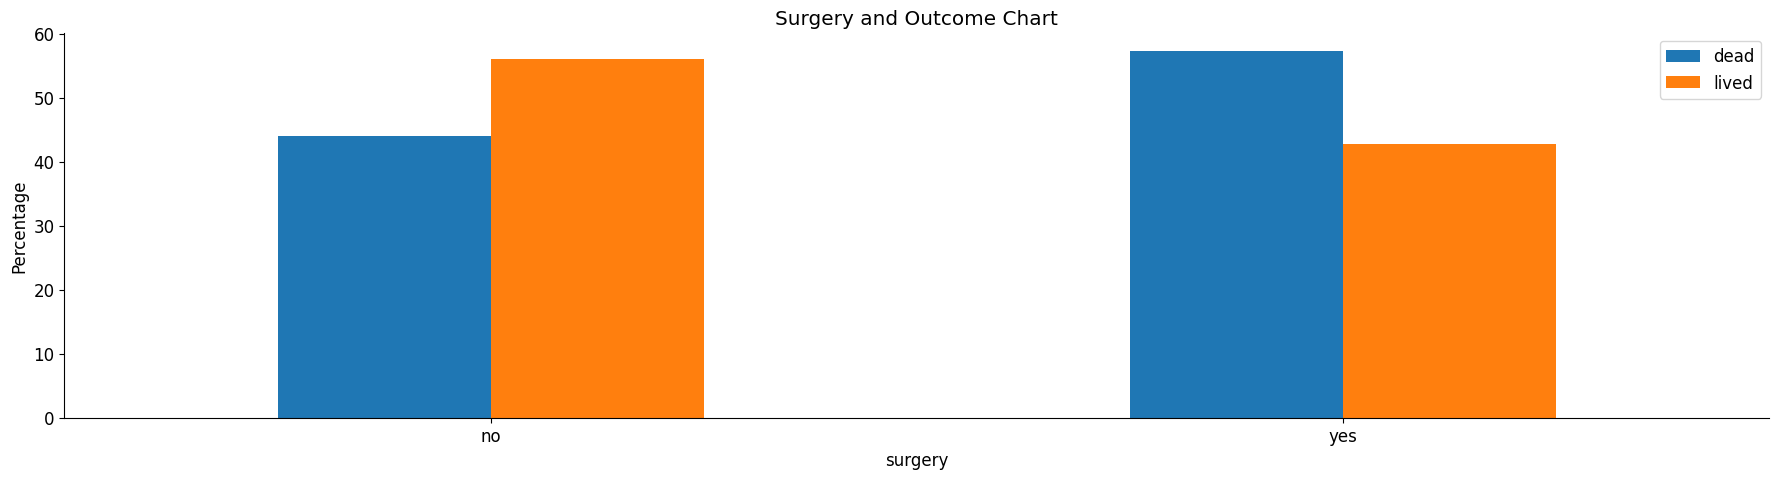

In [87]:
pivot.set_index('surgery')[['dead', 'lived']].plot(kind='bar')
plt.title('Surgery and Outcome Chart')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.show()

**INSIGHT**

-  57% of the horses who went through the surgery ended up not living any more meaning 19 out of 33 horses.
- 56% of the horses who were not put under the needle lived meaning 14 out of 25 horses.